In [1]:
from transformers import pipeline

print("--- TAREA EXTRA: ZERO-SHOT CLASSIFICATION ---")
print("Objetivo: Detectar el TIPO de toxicidad sin re-entrenar el modelo.\n")

#Cargamos el pipeline (Baja el modelo automáticamente)
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

#Etiquetas que queremos probar 
candidate_labels = ["insult", "threat", "hate speech", "constructive criticism"]

#Ejemplos de tu dataset o inventados
ejemplos = [
     "i will let you die",
    "fire black athletes",
    "stupid people are everywhere",
    "you are a liar and stupid",
    "many times want to validate stupid actions",
    "trying to get shit done"
]

for text in ejemplos:
    result = classifier(text, candidate_labels)

    print(f"Texto: '{text}'")
    print(f"Ganador: {result['labels'][0]} (Confianza: {result['scores'][0]:.2%})")
    print("-" * 30)


c:\Users\js834\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


--- TAREA EXTRA: ZERO-SHOT CLASSIFICATION ---
Objetivo: Detectar el TIPO de toxicidad sin re-entrenar el modelo.



c:\Users\js834\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\js834\.cache\huggingface\hub\models--facebook--bart-large-mnli. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Device set to use cuda:0


Texto: 'i will let you die'
Ganador: threat (Confianza: 85.69%)
------------------------------
Texto: 'fire black athletes'
Ganador: threat (Confianza: 79.39%)
------------------------------
Texto: 'stupid people are everywhere'
Ganador: threat (Confianza: 52.71%)
------------------------------
Texto: 'you are a liar and stupid'
Ganador: insult (Confianza: 75.56%)
------------------------------
Texto: 'many times want to validate stupid actions'
Ganador: threat (Confianza: 48.79%)
------------------------------
Texto: 'trying to get shit done'
Ganador: threat (Confianza: 75.93%)
------------------------------


In [2]:
from transformers import pipeline

# Cargar pipeline de emociones
classifier_emotion = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", top_k=None)

ejemplos = ["I hope you die soon", "This game is so frustrating but I love it", "Eww, get away from me"]

# Probar
for texto in ejemplos:
    resultado = classifier_emotion(texto)
    # Mostrar la emoción ganadora
    print(f"Texto: '{texto}' -> Emoción: {resultado[0][0]['label']} ({resultado[0][0]['score']:.2f})")

c:\Users\js834\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\js834\.cache\huggingface\hub\models--j-hartmann--emotion-english-distilroberta-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is no

Texto: 'I hope you die soon' -> Emoción: neutral (0.64)
Texto: 'This game is so frustrating but I love it' -> Emoción: sadness (0.48)
Texto: 'Eww, get away from me' -> Emoción: disgust (0.55)


In [3]:
from transformers import pipeline

print("--- ANÁLISIS DE OBJETIVOS (NER) ---")
print("Objetivo: Identificar a QUÉ o QUIÉN se ataca (Personas, Organizaciones, Países).\n")

# 1. Cargar el pipeline de NER (Named Entity Recognition)
# aggregation_strategy="simple" es CLAVE: junta los tokens ("J", "##ohn") en palabras completas ("John")
ner_classifier = pipeline("ner", model="dslim/bert-base-NER", aggregation_strategy="simple")

# 2. Ejemplos con entidades claras
ejemplos_ner = [
    "I hate John because he is stupid",              # Ataque a Persona
    "Google is the worst company ever",              # Ataque a Organización
    "I will destroy Paris and all its people",       # Ataque a Lugar
    "Americans are always so loud",                  # Ataque a Grupo (Gentilicio)
    "Kill Elon Musk right now"                       # Amenaza directa a Persona
]

# 3. Procesar y mostrar resultados
for texto in ejemplos_ner:
    entidades = ner_classifier(texto)
    
    print(f"Frase: '{texto}'")
    if len(entidades) > 0:
        for ent in entidades:
            # ent['entity_group'] te dice si es PER (Persona), ORG (Organización), LOC (Lugar), etc.
            print(f"  └── 🎯 Entidad detectada: {ent['word']} (Tipo: {ent['entity_group']}, Confianza: {ent['score']:.2f})")
    else:
        print("  └── No se detectaron nombres propios específicos.")
    print("-" * 30)

--- ANÁLISIS DE OBJETIVOS (NER) ---
Objetivo: Identificar a QUÉ o QUIÉN se ataca (Personas, Organizaciones, Países).



c:\Users\js834\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\js834\.cache\huggingface\hub\models--dslim--bert-base-NER. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back 

Frase: 'I hate John because he is stupid'
  └── 🎯 Entidad detectada: John (Tipo: PER, Confianza: 1.00)
------------------------------
Frase: 'Google is the worst company ever'
  └── 🎯 Entidad detectada: Google (Tipo: ORG, Confianza: 1.00)
------------------------------
Frase: 'I will destroy Paris and all its people'
  └── 🎯 Entidad detectada: Paris (Tipo: LOC, Confianza: 1.00)
------------------------------
Frase: 'Americans are always so loud'
  └── 🎯 Entidad detectada: Americans (Tipo: MISC, Confianza: 1.00)
------------------------------
Frase: 'Kill Elon Musk right now'
  └── 🎯 Entidad detectada: El (Tipo: PER, Confianza: 0.92)
  └── 🎯 Entidad detectada: ##on Musk (Tipo: PER, Confianza: 0.86)
------------------------------


Analizando 10 frases con Zero-Shot...


/tmp/ipykernel_8723/3032959429.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.index, y=conteo.values, palette='viridis')
/tmp/ipykernel_8723/3032959429.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_res, x='label', y='score', palette='coolwarm')


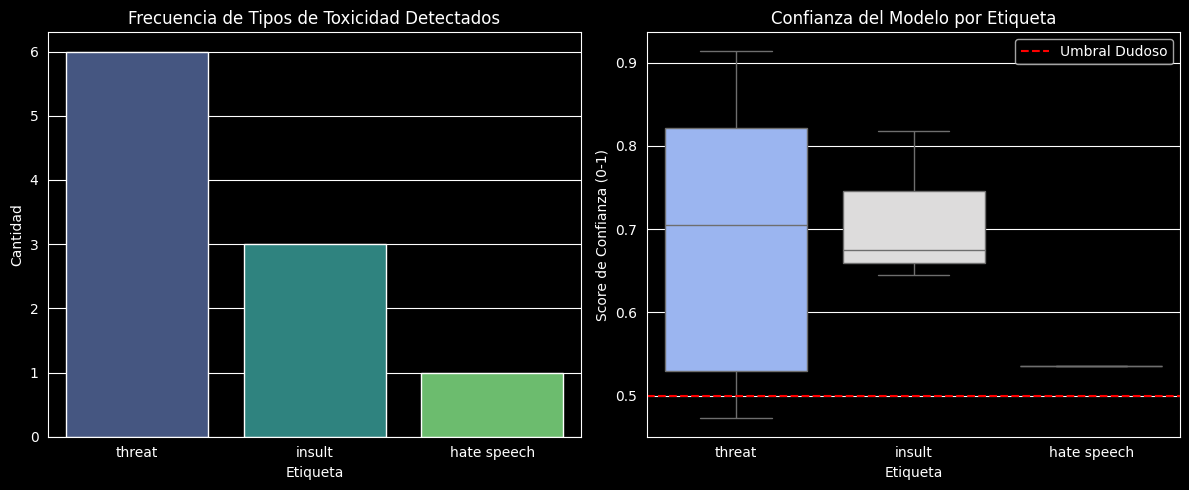


--- Casos con BAJA CONFIANZA (< 0.5) ---
Texto: 'stop doing that, it's wrong'
Predicción: threat (0.47) -> ¿Ambiguo?

Texto: 'black people should leave'
Predicción: threat (0.48) -> ¿Ambiguo?



In [7]:
# --- CELDA DE EVALUACIÓN ROBUSTA (Para Notebook 4c) ---
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def evaluar_zeroshot_analitico(classifier, textos, labels):
    """
    Analiza la distribución de predicciones y la confianza del modelo Zero-Shot.
    """
    results = []

    print(f"Analizando {len(textos)} frases con Zero-Shot...")

    for txt in textos:
        res = classifier(txt, labels)
        # Tomar la etiqueta ganadora y su score
        top_label = res['labels'][0]
        top_score = res['scores'][0]
        results.append({'texto': txt, 'label': top_label, 'score': top_score})

    df_res = pd.DataFrame(results)

    # 1. Gráfico de Distribución de Clases Predichas
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    conteo = df_res['label'].value_counts()
    sns.barplot(x=conteo.index, y=conteo.values, palette='viridis')
    plt.title('Frecuencia de Tipos de Toxicidad Detectados')
    plt.xlabel('Etiqueta')
    plt.ylabel('Cantidad')

    # 2. Gráfico de Confianza por Clase (Boxplot)
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df_res, x='label', y='score', palette='coolwarm')
    plt.title('Confianza del Modelo por Etiqueta')
    plt.xlabel('Etiqueta')
    plt.ylabel('Score de Confianza (0-1)')
    plt.axhline(0.5, color='red', linestyle='--', label='Umbral Dudoso')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # 3. Mostrar casos con baja confianza (Edge cases)
    print("\n--- Casos con BAJA CONFIANZA (< 0.5) ---")
    low_conf = df_res[df_res['score'] < 0.5]
    if not low_conf.empty:
        for idx, row in low_conf.iterrows():
            print(f"Texto: '{row['texto']}'")
            print(f"Predicción: {row['label']} ({row['score']:.2f}) -> ¿Ambiguo?\n")
    else:
        print("El modelo tuvo alta confianza en todos los ejemplos.")

# EJECUCIÓN
# Definimos una lista más amplia de ejemplos para que las gráficas tengan sentido
ejemplos_ampliados = [
    "i will kill you",
    "you are stupid and ugly",
    "i hate people from that country",
    "stop doing that, it's wrong", # Constructive/Neutral
    "you are an idiot",
    "i hope you die",
    "black people should leave",
    "this is not good work",
    "you look like a pig",
    "i will find you and hurt you"
]

labels_eval = ["threat", "insult", "hate speech", "constructive criticism"]

# Ejecutar análisis
evaluar_zeroshot_analitico(classifier, ejemplos_ampliados, labels_eval)

Preprocesando textos...
Evaluando sobre 200 muestras reales...
Iniciando clasificación Zero-Shot (esto puede tardar unos minutos)...


100%|██████████| 200/200 [00:14<00:00, 13.70it/s]



--- REPORTE DE CLASIFICACIÓN ZERO-SHOT ---
              precision    recall  f1-score   support

   non-toxic       0.91      0.78      0.84       101
       toxic       0.81      0.92      0.86        99

    accuracy                           0.85       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.86      0.85      0.85       200



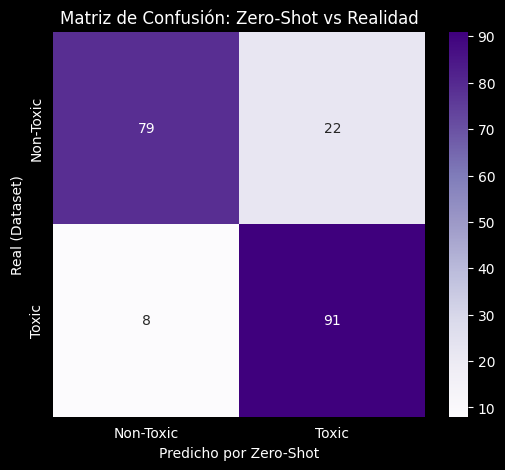

In [9]:
# --- EVALUACIÓN MASIVA ZERO-SHOT (CORREGIDO) ---
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import ast
from tqdm import tqdm

# 1. Cargar tus datos
try:
    # Ajusta la ruta si es necesario
    df_test = pd.read_csv('datos/english_multilingual_toxicity_preprocessed_non_lemmatized.csv')

    # --- CORRECCIÓN: CREAR LA COLUMNA 'TEXT' ---
    # El CSV tiene tokens como "['hola', 'mundo']", hay que unirlos en una frase "hola mundo"
    print("Preprocesando textos...")
    # Convertimos el string "['a','b']" a una lista real de python
    df_test['text_tokens'] = df_test['text_tokens'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    # Unimos la lista en un solo string
    df_test['text'] = df_test['text_tokens'].apply(lambda x: " ".join(x))

    # Tomamos una muestra para que no tarde demasiado (Zero-shot es pesado)
    df_sample = df_test.sample(200, random_state=42)
    print(f"Evaluando sobre {len(df_sample)} muestras reales...")

except Exception as e:
    print(f"Error cargando datos: {e}")
    # Fallback por si no encuentra el archivo, para que veas que el código funciona
    data = {'text': ["you are stupid", "i love you", "i will kill you"], 'toxic': [1, 0, 1]}
    df_sample = pd.DataFrame(data)

# 2. Definir etiquetas para el Zero-Shot
# IMPORTANTE: Estas etiquetas deben tener sentido semántico para el modelo
candidate_labels = ["non-toxic", "toxic"]

# 3. Ejecutar predicciones
y_true = []
y_pred = []

print("Iniciando clasificación Zero-Shot (esto puede tardar unos minutos)...")
for index, row in tqdm(df_sample.iterrows(), total=len(df_sample)):
    texto_a_evaluar = row['text']

    # Obtener la etiqueta real (Asegurándonos de que sea string para comparar)
    true_label = "toxic" if row['toxic'] == 1 else "non-toxic"

    # Inferencia Zero-Shot
    # El modelo devolverá scores para "toxic" y "non-toxic"
    res = classifier(texto_a_evaluar, candidate_labels)

    # La etiqueta ganadora está en la posición 0
    predicted_label = res['labels'][0]

    y_true.append(true_label)
    y_pred.append(predicted_label)

# 4. Reporte Profesional
print("\n--- REPORTE DE CLASIFICACIÓN ZERO-SHOT ---")
print(classification_report(y_true, y_pred))

# 5. Matriz de Confusión Visual
cm = confusion_matrix(y_true, y_pred, labels=["non-toxic", "toxic"])
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=["Non-Toxic", "Toxic"],
            yticklabels=["Non-Toxic", "Toxic"])
plt.xlabel('Predicho por Zero-Shot')
plt.ylabel('Real (Dataset)')
plt.title('Matriz de Confusión: Zero-Shot vs Realidad')
plt.show()